<div>
<div >
<style>
    ul { display:table; margin:0 auto;}
<style>
<div style="text-align: center">
   <h1 aling= "center" >Proyecto Final de Bases de Datos</h1>
   <br/>
<br/>
   Integrantes:
<ul>
<li>Juan Carlos Ceballos</li>
<li>Roberto Gerrero </li>
<li>Roides Javier Cruz</li>
<ul/>
   
</div>
<br/>
<br/>

</div>


</div>

<div style="text-align: center">
<style>
    ul { display:table; margin:0 auto;}
<style>
<h1>Poryecto Final de Inteligencia Artifical<h1/>
<ul>
<li>Juan Carlos Ceballos<li/>
<li>Roberto Guerror Bueno<li/>
<li>Roides javier Cruz<li/>
<ul/>

<div/>

<div style="text-align: center">
<img style="margin:0px auto;display:block" src="LANIA.jpg"/>
<br/>
<br/>
<h1>Proyecto Final de Inteligencia de Artificial</h1>

<br/>
<br/>
<h2>Recuperación de datos discretizados utilizando funciones de distribución de probabilidad</h2>
<br/>
<br/>
<br/>

<div>
<h3>Autor:

<br/>

<div>Roides Javier Cruz</div>
<h3/>

<br/>
<br/>
<br/>
<br/>


<div/>

# Planteamiento del Problema

<div style="text-align: justify">
Diseñar un algoritmo que logre recuperar los datos que han sido discretizados de un conjunto determinado de datos independientemente del método de discretización utilizado.
<div/>
<br/>
    <h2>Propuesta de Solución</h2>
<div style="text-align: justify">
La distribución de probabilidad de una variable aleatoria es una función que realciona a cada suceso definido sobre la variable aleatoria la probabilidad de que dicho suceso se observe. La distribución de probabilidad se define sobre el conjunto de todos los sucesos y cada uno de los sucesos es el rango de valores de la variable aleatoria. La función de probabilidad está asociada a las distribuciones de frecuencia de un conjunto de datos. Ya que una función de distribución de probabilidades no es más que una frecuencia teórica, siendo ésta última la que describe cómo se espera que varíen los resultados.
<br/>
Se definirán primero los conpectos de Variable Aleatoria, Espacio de probabilidad y de Función de Distribución de Probabilidad.
<br/>
Una variable aleatoria ${\displaystyle X}$ es una función real definida en el espacio de probabilidad, ${\displaystyle (\Omega ,{\mathcal {A}},P)}$ asociado a un experimento aleatorio. Donde ${\displaystyle \Omega }$  es llamado espacio muestral, conjunto de los posibles resultados del experimento, llamados sucesos elementales. Segundo, por la colección ${\displaystyle {\mathcal {B}}} $ de todos los sucesos aleatorios (no solo los elementales), o resultados que se pueden dar en el experimento aleatorio.Por último, una medida de probabilidad o función de probabilidad ${\displaystyle P\ } $, que asigna una probabilidad a todo suceso.
La función de Distribuciónde Probabilidad entonces se define como: 
$F(x)=\operatorname {P}(X\leq x)$,	Una función de nombre "F" le asigna a cada valor real $x$, el de la probabilidad de que una variable aleatoria $X$ asuma un valor inferior o igual a $x$.
Luego la probabilidad de que X se sitúe en un intervalo $]a, b]$(abierto en a y cerrado en b) es $F(b) − F(a)$ si $a ≤ b$ se define como:

${\displaystyle \mathbb {P} (a\leq X \leq b) =F_{X}(b)-F_{X}(a)} $
<br/>
<h2>Algoritmo Propuesto</h2>
<br/>
El algoritmo propuesto utiliza la función de probabilidad de los datos para así conocer la posiblidad de que cierto dato apareca en el conjunto de datos. Ya que se conoce el tamaño del conjunto se puede generar el dato cuantas veces ha sido observado en conjunto original antes de ser discretizados. El algoritmo realiza los siguientes pasos:
<ol>
<li>Estimar la Función distribución de probabilidad normalizada para un determinado número de beans (intervalos)</li>
<li>A partir de la probabilidad asignada a cada beans generar $P*N$ valores mediante una distribución normal, donde $P$ es la probabilidad del intervalo y $N$ es la cantidad de elementos del conjunto de datos</li>
<ol/>
<div/>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as formula
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division, print_function
import random
import sklearn
import pylab
import math as math
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from math import exp, expm1,sqrt
import graphviz as gv
from graphviz import Digraph
import random


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000284DA985B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000284DAAC1908>]], dtype=object)

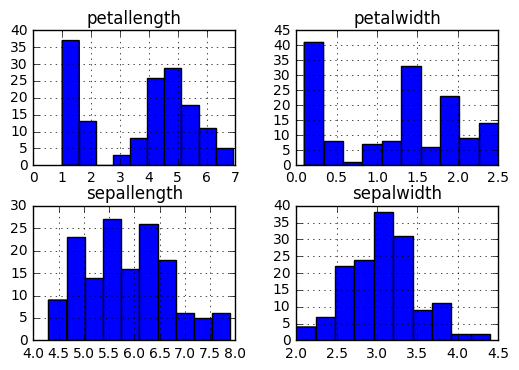

In [2]:
iris = pd.read_csv("iris.csv")
#quitando variable clase
iris.drop("class", axis=1, inplace=True)
iris.hist()

Sumatoria de probilidades=1.0: FDP nommalizada


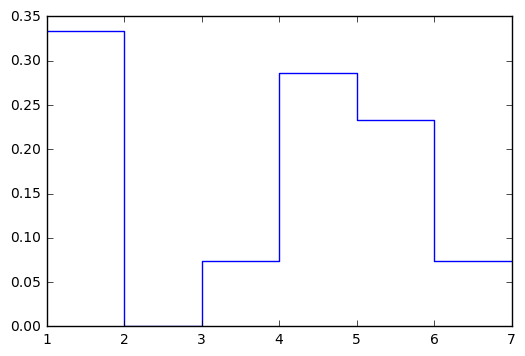

[ array([ 0.33333333,  0.        ,  0.07333333,  0.28666667,  0.23333333,
        0.07333333])
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.]) 150]


In [4]:
# Obteniendo la Función de distribucón de Probabilidades
def estimar_FDP(dataSet, atributo):
    numero_bins= round(math.sqrt(dataSet.shape[0]))
    #nomrmalizando ya que por si solo la funcion de numpy no normaliza
    minimo, maximo = np.floor(dataSet[atributo].min()), np.ceil(dataSet[atributo].max())
    bins = np.linspace(minimo, maximo, maximo - minimo + 1)
    FDP=np.histogram(dataSet[atributo], bins=bins, range=None, normed=True, weights=None, density=True)
    probabilidad, bins=FDP
    print('Sumatoria de probilidades='+str(probabilidad.sum())+": FDP nommalizada")
    FDP=np.array([probabilidad,bins,dataSet.shape[0]])
    left,right = bins[:-1],bins[1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([probabilidad,probabilidad]).T.flatten()
    plt.plot(X,Y)
    plt.show()
    print(FDP)
    return FDP
# Se obtiene la DFP para el atributo petallength como ejemplo demostrativo    
funcion_Distribucion=estimar_FDP(iris, 'petallength')

7
Recuperando datos para el atributo
Intervalo0(1.0-2.0) con P= 0.333333333333
Se generanán 50 datos en este intervalo con disrtribución normal
Intervalo1(2.0-3.0) con P= 0.0
Se generanán 0 datos en este intervalo con disrtribución normal
Intervalo2(3.0-4.0) con P= 0.0733333333333
Se generanán 11 datos en este intervalo con disrtribución normal
Intervalo3(4.0-5.0) con P= 0.286666666667
Se generanán 43 datos en este intervalo con disrtribución normal
Intervalo4(5.0-6.0) con P= 0.233333333333
Se generanán 35 datos en este intervalo con disrtribución normal
Intervalo5(6.0-7.0) con P= 0.0733333333333
Se generanán 11 datos en este intervalo con disrtribución normal
Calculando el error cuadrático medio en los datos recuperados y los originales
(Atributo_recuperado[0]-Atributo_original[0])^2=0.0339055300676
(Atributo_recuperado[1]-Atributo_original[1])^2=0.127365718786
(Atributo_recuperado[2]-Atributo_original[2])^2=0.0496379292146
(Atributo_recuperado[3]-Atributo_original[3])^2=0.13409664440

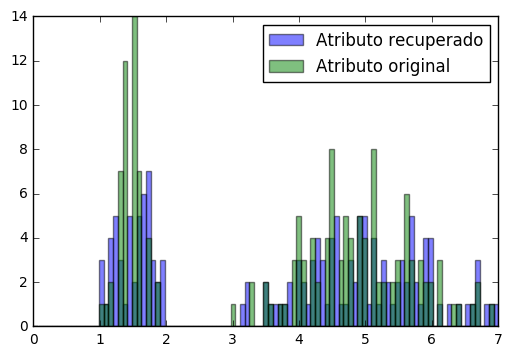

In [8]:
Probabilidades=funcion_Distribucion[0]
Bins=funcion_Distribucion[1]
longitud_dataset=funcion_Distribucion[2]
tamaño_bins=longitud_dataset/Probabilidades.shape[0]
tamaño_bins
dataset_recuperado=np.array(Probabilidades.shape[0])
FA=0
print(Bins.shape[0])
Atributo_recueperado=[]
#Recuperando los datos
print("Recuperando datos para el atributo")
for i  in range(0,Probabilidades.shape[0]):
    # recuperando la frecuencia absoluta
    
    FA= int(round(Probabilidades[i]*longitud_dataset))
    print('Intervalo'+str(i)+'('+str(Bins[i])+'-'+str(Bins[i+1])+') con P= '+str(Probabilidades[i]))
    print('Se generanán '+str(FA)+" datos en este intervalo con disrtribución normal")
    for j in range(0,FA):
        dato_recuperado=np.random.uniform(Bins[i],Bins[i]+1)
        #print(dato_recuperado)
        Atributo_recueperado.append(dato_recuperado)
        # ya conocemos la cantidad de veces que se repiten los valores que se encuentran dentro del intervalo

        
Atributo_recueperado=np.array(Atributo_recueperado)
Atributo_original=np.array(iris['petallength'])  
Atributo_original.sort()
Atributo_original
#calculando el error cuadratico medio en los datos recuperados y los originales
ECM=0
print("Calculando el error cuadrático medio en los datos recuperados y los originales")
for i in range(0,len(Atributo_recueperado)):
    print("(Atributo_recuperado["+str(i)+"]-Atributo_original[" +str(i)+"])^2="+str(pow(Atributo_recueperado[i]-Atributo_original[i],2)))
    ECM+= pow(Atributo_recueperado[i]-Atributo_original[i],2)
ECM=ECM/len(Atributo_recueperado)
print('Error cuadrático medio='+str(ECM))
    
    
bins = np.linspace(0, 7, 100)

plt.hist(Atributo_recueperado, bins, alpha=0.5, label='Atributo recuperado')
plt.hist(Atributo_original, bins, alpha=0.5, label='Atributo original')
plt.legend(loc='upper right')
plt.show()  
    
    
    

# Conclusiones
<br/>
<div style="text-align: justify">
El uso de la función  de distribución de probabilidad permite recuperar los datos de un atributo o conjunto de atributos mediante el conocimientos de la frecuencia con que estos valores se observan en el conjunto de datos.

Como se puede observar la solución propuesta también presenta aunque considerablemente baja (si tenemos en cuanta el error cuadrático médio) presenta cierta périda de información, ya que utiliza las probabilidades de los intervalos y no de los sucesos elementales de la variable aleatoria, en éste caso un atributo del conjunto de datos. La utilización de los intervalos es una forma de controlar el costo computacional de guardar valores contínuos (en un intervalo cualquiera son infinitos),  puesto que si tuvieramos un atributo con número masivo de valores diferentes por ejemplo 10^20 sería casi imposible de almacenar y de analizar.

</div>